In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData
from NecessaryModules.splitData import split_data

In [116]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

# PCA Implementation

In [117]:
pcaTrain = PCA(n_components=17).fit(dataset)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

PCA(n_components=17)
<class 'numpy.ndarray'>
17
[[-0.85933286 -0.96140676 -0.58608236 ...  0.22099919  0.01942968
  -0.30501074]
 [ 0.76552441 -1.06271411 -1.39733865 ...  0.37326369 -0.08632072
  -0.35255257]
 [-1.11681736 -0.39225594  0.00798828 ...  0.07631685  0.07863121
  -0.10937064]
 ...
 [-2.00968648  0.00702143  0.3456035  ... -0.0271935  -0.01261482
   0.02516145]
 [-1.87850608 -0.25826339  0.27997341 ... -0.05091934 -0.02913728
   0.05199774]
 [-1.54878315 -0.18752643  0.21757082 ...  0.0383998   0.0298631
   0.07242581]]


In [118]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset,label)
print(len(X_train[0]))

34


In [119]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
240
[[-0.33612233  0.12978644 -0.36139445 ... -0.01217479  0.08868243
   0.09065639]
 [ 1.65644037 -1.31013399 -0.35284732 ...  0.24465746  0.27665288
   0.20568583]
 [ 0.19733621  0.74028009 -1.29245984 ...  0.12297515  1.96456615
  -0.2508993 ]
 ...
 [-0.38177572  0.19359505 -0.46190176 ... -0.20512175  0.05118783
   0.06513455]
 [-1.98086955  0.5598821   0.52226003 ...  0.00915839 -0.06392697
   0.05031344]
 [ 0.44046951 -0.82218094 -0.25778992 ...  0.4850646   0.51995604
   0.70787156]]
<class 'numpy.ndarray'>
111
[[-1.26496468e+00  1.15398695e-01  1.09606915e-01 ...  6.84806476e-02
  -6.50164526e-02 -4.44901000e-02]
 [ 3.15274689e-01 -4.19332246e-01 -1.18937376e+00 ... -3.45455048e-01
   1.53127760e-01  4.23382822e-01]
 [ 3.08561987e+00  7.37257686e-01  4.10028523e-01 ... -6.25276279e-02
  -1.86803390e-02  1.20588690e-01]
 ...
 [-2.68435357e+00  8.99506205e-01 -3.71101272e-01 ...  5.68358599e-01
   4.85700220e-02 -1.15935863e+00]
 [-6.93184474e-01 -3.701107

# tune SVC

In [120]:
# train the model with random parameter
from sklearn.svm import SVC

model_SVC = SVC(
        C=8.75,#Regularization parameter
        kernel="rbf", # maximum number of estimators at which boosting is terminated
        gamma=0.4,
        tol=0.483,
        decision_function_shape='ovo',
        
     )

model_SVC.fit(compressed_dataset_X_train, y_train)

SVC(C=8.75, decision_function_shape='ovo', gamma=0.4, tol=0.483)

In [121]:
# Finding mean absolute error
preds = model_SVC.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.08108108108108109

In [122]:
# Defining the best parameter with optuna
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(compressed_dataset_X)
target_train_tunned= np.array(label)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_SVC(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        
    param = {
        'C':trial.suggest_float("C",0,10), #For regularization    
        'kernel':trial.suggest_categorical('kernel',["linear", "poly", "rbf", "sigmoid"]),
        'degree':trial.suggest_int('degree',1,10),
        'gamma':trial.suggest_float('gamma',0,1),
        # 'tol':trial.suggest_float('tol',0,5),
        # 'coef0':trial.suggest_float('coed0',0,3),
        'decision_function_shape':trial.suggest_categorical('decision_function_shape',['ovo','ovr']),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model= SVC(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X

      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [123]:
# this is the main optuna for optimizing a object-->"objective"
study_SVC = optuna.create_study(direction='minimize',study_name="SVC_tunning")

[I 2024-02-10 14:42:20,792] A new study created in memory with name: SVC_tunning


In [124]:

study_SVC.optimize(objective_SVC, n_trials=5) 
print('Number of finished trials:', len(study_SVC.trials))
print('Best trial:', study_SVC.best_trial.params)

[I 2024-02-10 14:42:20,832] Trial 0 finished with value: 0.05982905982905983 and parameters: {'C': 9.8546114179453, 'kernel': 'rbf', 'degree': 10, 'gamma': 0.6039330121674238, 'decision_function_shape': 'ovo', 'random_state': 4}. Best is trial 0 with value: 0.05982905982905983.
[I 2024-02-10 14:42:20,862] Trial 1 finished with value: 0.04843304843304843 and parameters: {'C': 0.540054360861677, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.32251321848623515, 'decision_function_shape': 'ovr', 'random_state': 1}. Best is trial 1 with value: 0.04843304843304843.
[I 2024-02-10 14:42:20,892] Trial 2 finished with value: 0.15384615384615385 and parameters: {'C': 1.9355037544274378, 'kernel': 'poly', 'degree': 1, 'gamma': 0.8159498861699109, 'decision_function_shape': 'ovo', 'random_state': 2}. Best is trial 1 with value: 0.04843304843304843.
[I 2024-02-10 14:42:20,922] Trial 3 finished with value: 0.452991452991453 and parameters: {'C': 7.282421156594426, 'kernel': 'sigmoid', 'degree': 6, 'gamma':

Number of finished trials: 5
Best trial: {'C': 0.540054360861677, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.32251321848623515, 'decision_function_shape': 'ovr', 'random_state': 1}


In [125]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_SVC, params=["C", "kernel","degree","gamma","decision_function_shape","random_state"])
fig_study.show()

In [126]:
#evaluate the trial
print("Number of finished trials: ", len(study_SVC.trials))
print("Best trial:")
trial = study_SVC.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.04843304843304843
  Params: 
    C: 0.540054360861677
    kernel: rbf
    degree: 3
    gamma: 0.32251321848623515
    decision_function_shape: ovr
    random_state: 1


# fit SVM


In [127]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_SVC = np.array(compressed_dataset_X_train)
target_train_SVC = np.array(y_train)

test_SVC = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_SVC = np.zeros((len(test_SVC)))
oof_preds_SVC = np.zeros((len(train_SVC)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_SVC[train_index], train_SVC[val_index]
    train_y, valid_y = target_train_SVC[train_index], target_train_SVC[val_index]
    ada_params = study_SVC.best_trial.params
    model_SVC_2 = SVC(**ada_params,tol=.00001) # for early_stopping
    model_SVC_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_SVC_2.predict(valid_X)
    oof_preds_SVC[val_index] = preds
    # for test accuracy
    preds = model_SVC_2.predict(test_SVC)
    test_preds_SVC += (preds)/5
print(np.abs(oof_preds_SVC-target_train_SVC).mean())

100%|██████████| 5/5 [00:00<00:00, 11.36it/s]

0.041666666666666664


In [128]:
target_test_SVC = np.array(y_test)

In [129]:
from sklearn.metrics import accuracy_score
valid_Acc_SVC=accuracy_score(target_train_SVC,oof_preds_SVC)
print(valid_Acc_SVC)

# another technique for calculate test accuracy
test_Acc_SVC=accuracy_score(target_test_SVC,test_preds_SVC.round())
print(test_Acc_SVC)

0.9583333333333334
0.9369369369369369


In [130]:
train_Acc_SVC=model_SVC_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_SVC)

0.9708333333333333


In [131]:
test_Acc_SVC=model_SVC_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_SVC)

0.9279279279279279


# Evaluation

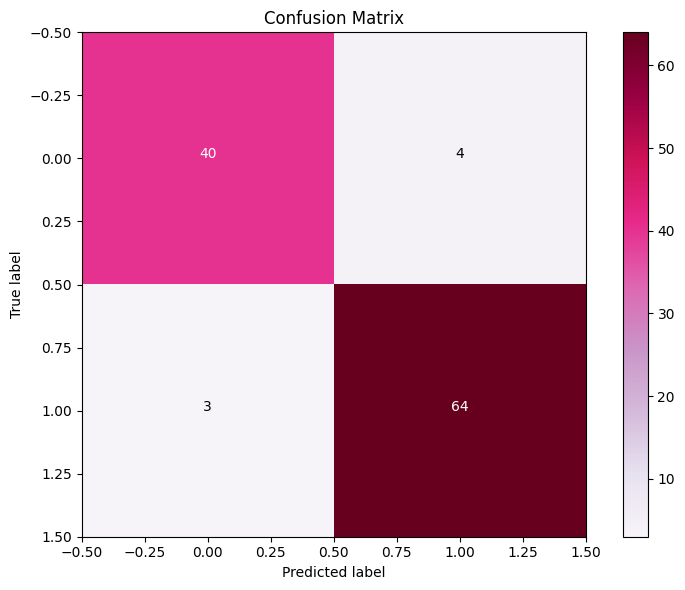

In [132]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_SVC.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


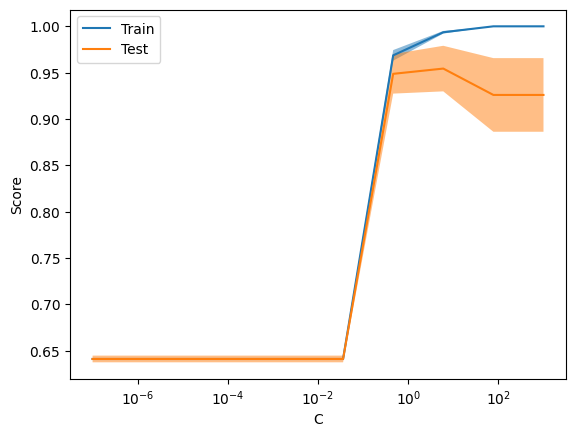

In [133]:
############# validaition_curve #####################
from sklearn.model_selection import ValidationCurveDisplay
ValidationCurveDisplay.from_estimator(
   SVC(**trial.params), compressed_dataset_X, label, param_name="C", param_range=np.logspace(-7, 3, 10)
)
plt.show()